**Boosting is a powerful ensemble technique where multiple weak learners (typically decision trees) are combined to form a strong model. The most common boosting algorithms include AdaBoost, Gradient Boosting, and XGBoost. Here’s a brief overview and sample code for each.**

# Load libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler

#Remove the warnings
import warnings
warnings.filterwarnings("ignore")

# AdaBoost (Adaptive Boosting)  
**Combines multiple weak learners sequentially.**  
**Each model tries to correct errors from the previous one.**  
**Works well with simple decision trees as weak learners.**

# Content  
**price:** price in US dollars (\$326--\$18,823)

**carat:** weight of the diamond (0.2--5.01)

**cut:** quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color:** diamond colour, from J (worst) to D (best)

**clarity:** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x:** length in mm (0--10.74)

**y:** width in mm (0--58.9)

**z:** depth in mm (0--31.8)

**depth:** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table:** width of top of diamond relative to widest point (43--95)

In [275]:
# Load the dataset
df=pd.read_csv('diamonds.csv')
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [276]:
# Shape of dataset
df.shape

(53940, 11)

In [277]:
df.drop('Unnamed: 0',axis=1,inplace=True)

# EDA

In [278]:
# Take the sample of data
df_100=df[0:5000]
df_100.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
4995,0.70,Ideal,F,VVS2,61.9,54.8,3741,5.68,5.72,3.53
4996,0.58,Ideal,D,VVS1,62.2,56.0,3741,5.34,5.36,3.33
4997,0.90,Good,I,VVS1,63.9,63.0,3741,6.04,6.07,3.87
4998,1.08,Good,J,SI2,63.2,59.0,3742,6.40,6.57,4.10
4999,1.05,Very Good,I,SI2,62.3,59.0,3742,6.42,6.46,4.01


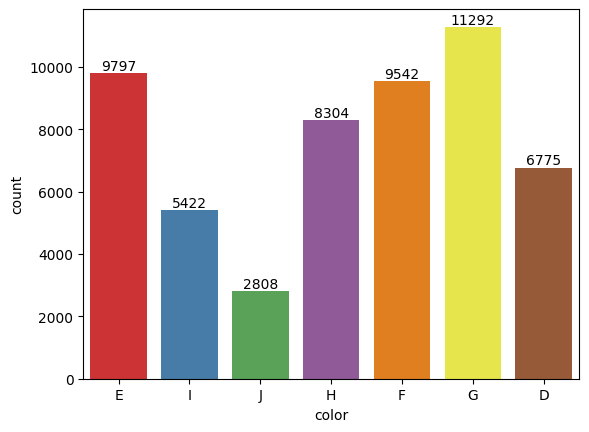

In [279]:
ax=sns.countplot(df,x=df["color"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

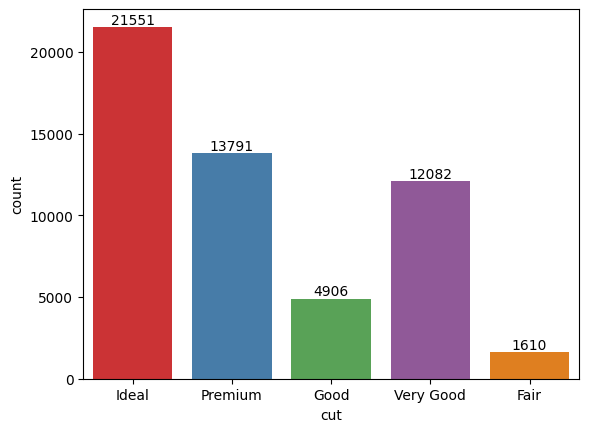

In [280]:
ax=sns.countplot(df,x=df["cut"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

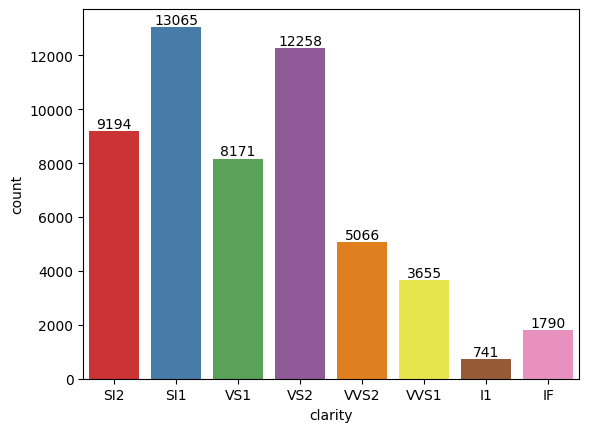

In [281]:
ax=sns.countplot(df,x=df["clarity"],palette="Set1")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

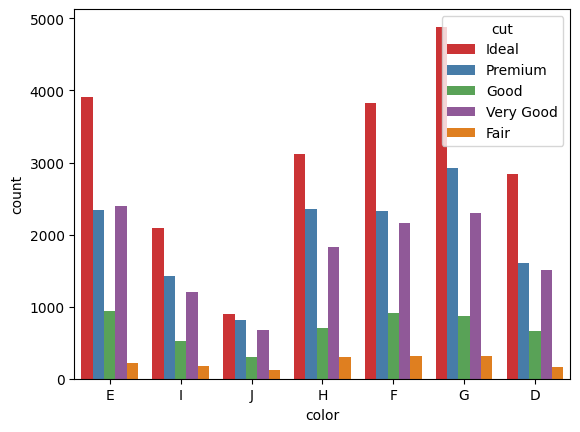

In [282]:
sns.countplot(df,x="color",hue="cut",palette="Set1")
plt.show()

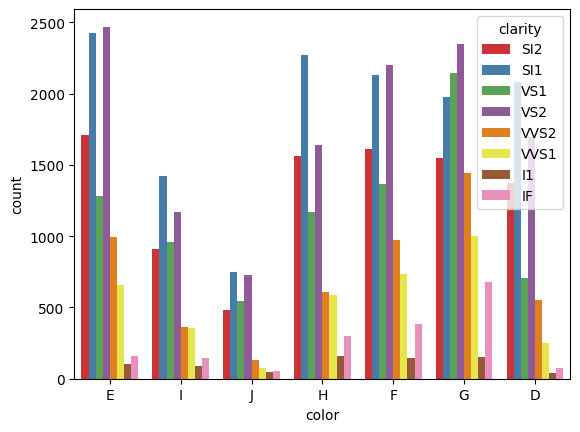

In [283]:
sns.countplot(df,x="color",hue="clarity",palette="Set1")
plt.show()

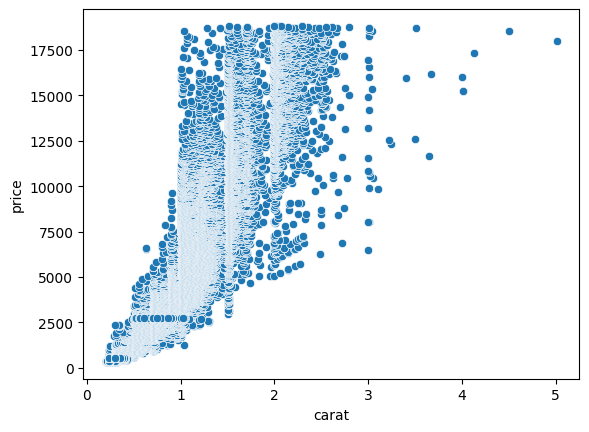

In [284]:
sns.scatterplot(df,x="carat",y="price")
plt.show()

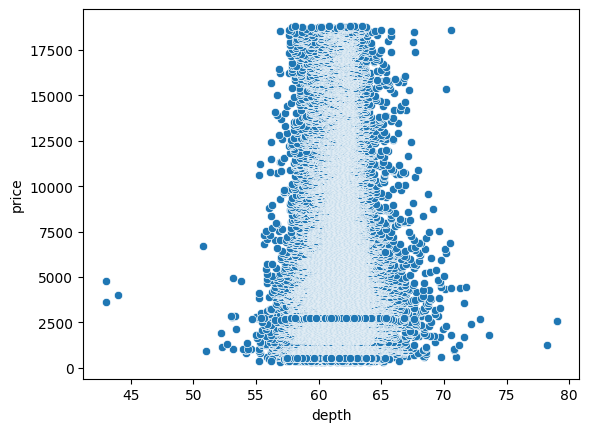

In [285]:
sns.scatterplot(df,x="depth",y="price")
plt.show()

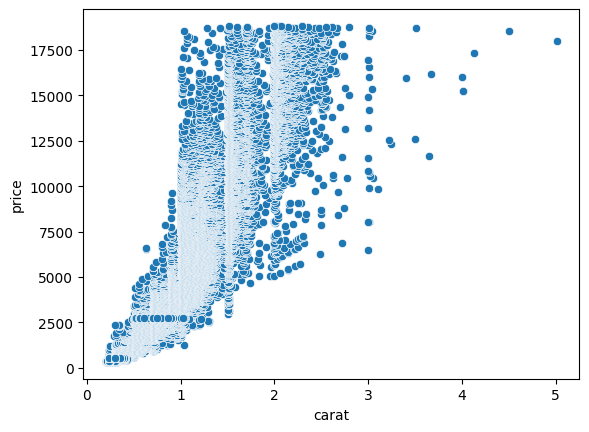

In [286]:
sns.scatterplot(df,x="carat",y="price")
plt.show()

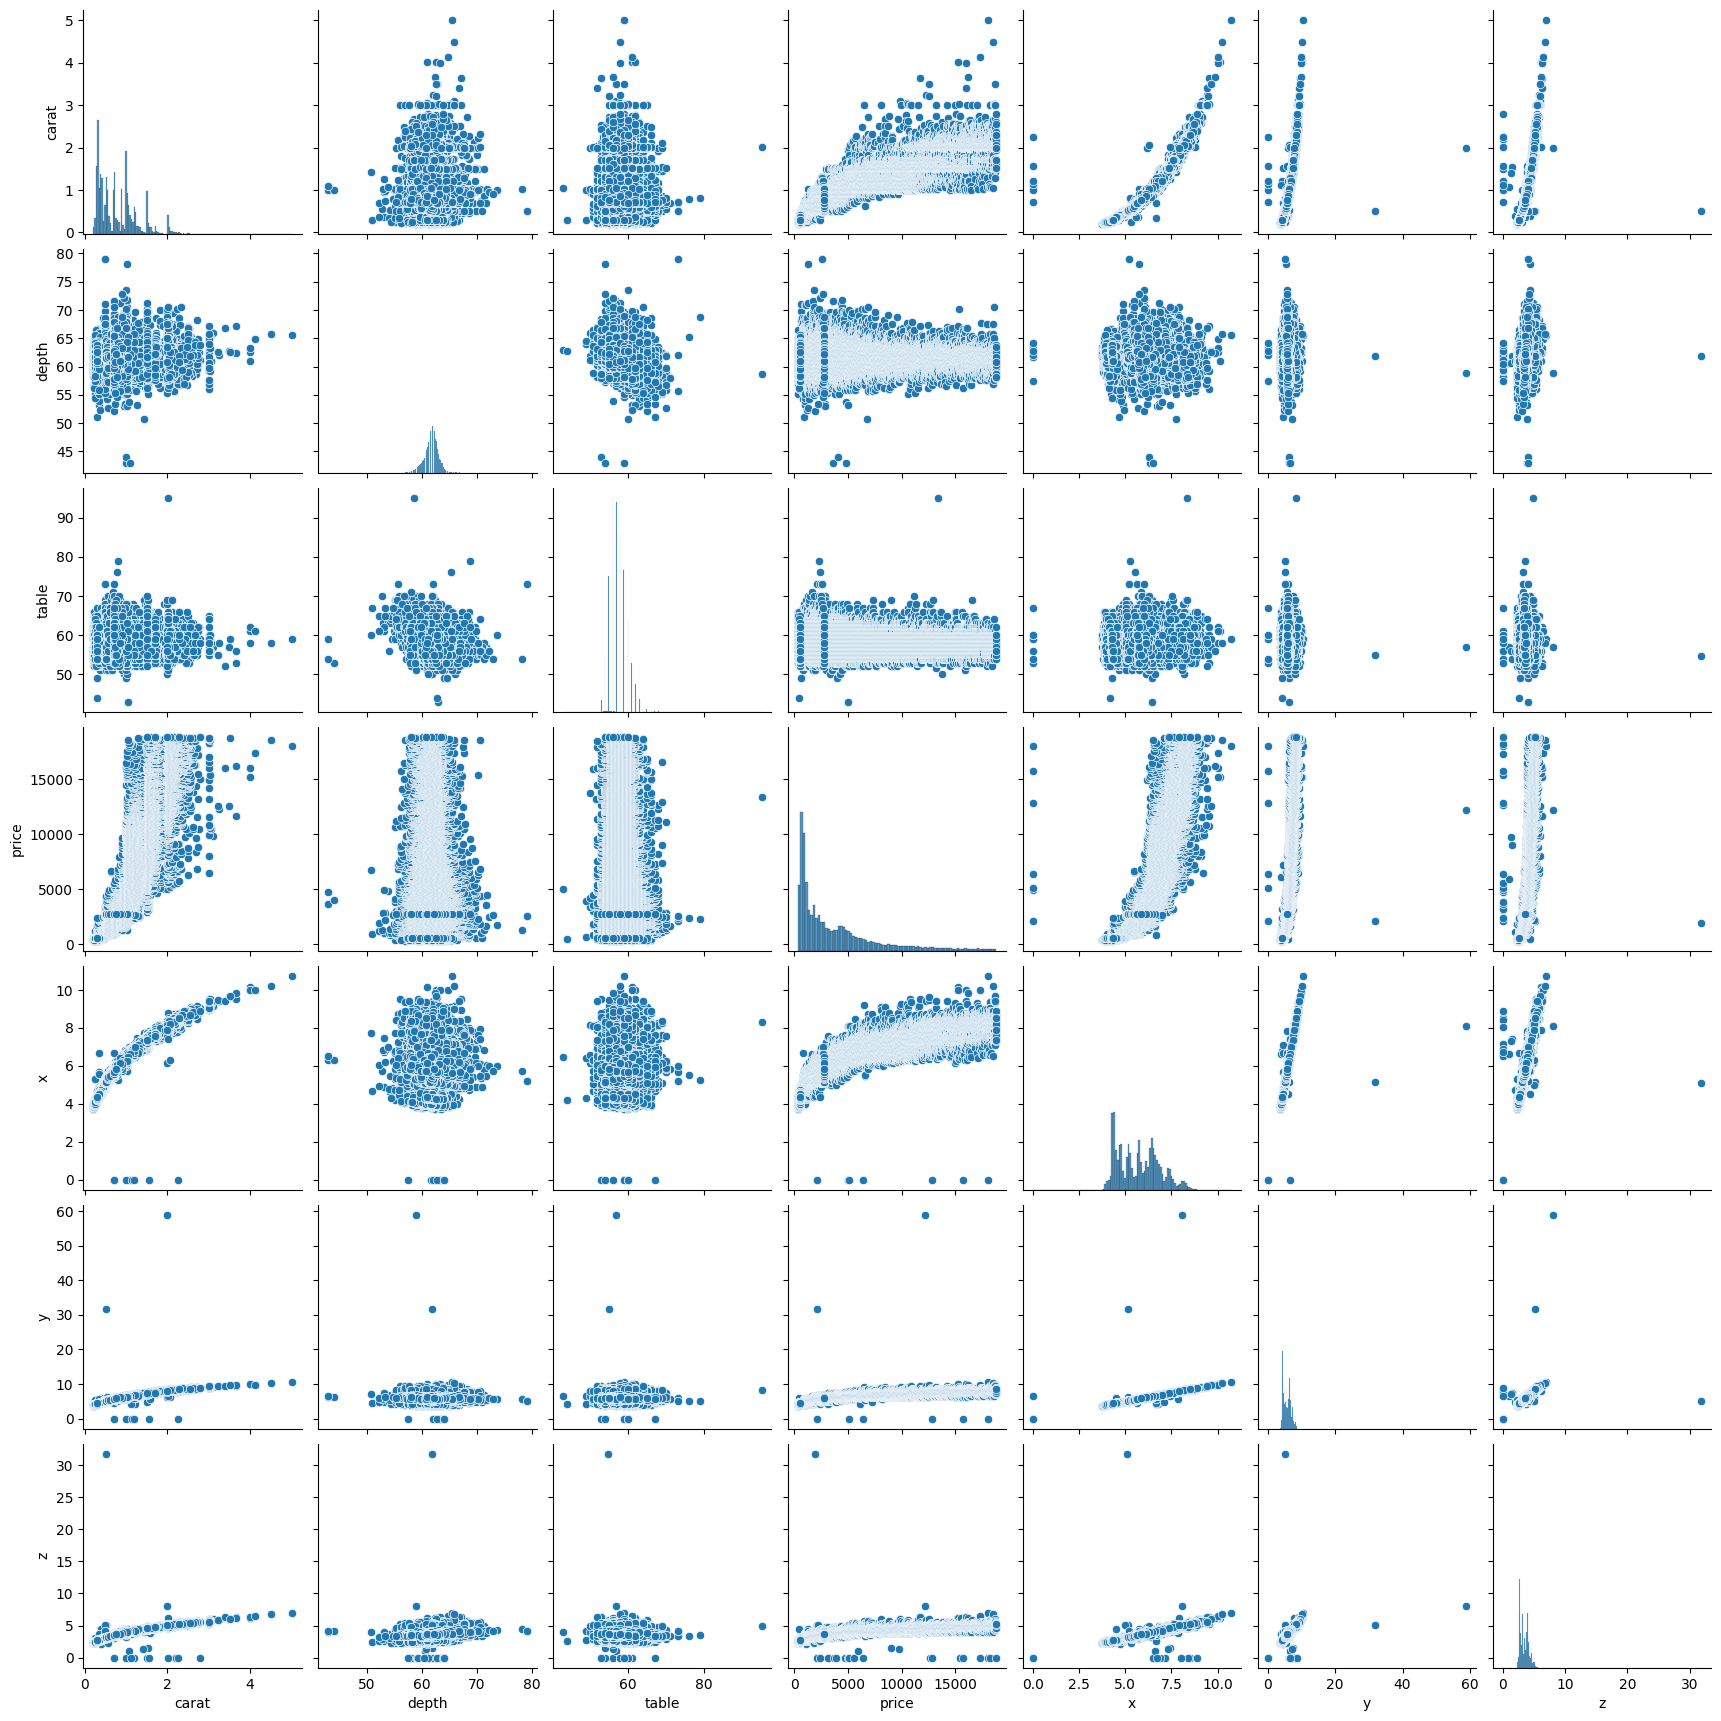

In [287]:
# other column shows in the  pairplot
sns.pairplot(df)
plt.show()  

# Data Preprocessing

In [288]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [289]:
df.duplicated().sum()

146

In [290]:
df=df.drop_duplicates()

**Convert text into num**

In [291]:
# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['cut', 'color', 'clarity'], drop_first=True)
# View transformed features
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False


**Convert the data same format**

In [292]:
for i in df:
    df[i]=MinMaxScaler().fit_transform(df[[i]])

In [293]:
df.head()

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.006237,0.513889,0.230769,0.000000,0.367784,0.067572,0.076415,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.002079,0.466667,0.346154,0.000000,0.362197,0.065195,0.072642,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.006237,0.386111,0.423077,0.000054,0.377095,0.069100,0.072642,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.018711,0.538889,0.288462,0.000433,0.391061,0.071817,0.082704,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.022869,0.563889,0.288462,0.000487,0.404097,0.073854,0.086478,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Apply model

In [294]:
X=df.drop("price",axis=1)
Y=df["price"]

In [295]:

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
# View the shape of the train and test sets
print(X_train.shape, X_test.shape)


(43035, 23) (10759, 23)


In [296]:
adaboost=AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

adaboost.fit(X_train,Y_train)

Y_pred=adaboost.predict(X_test)


print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))
print("R2 score = ",r2_score(Y_test,Y_pred))

MSE =  0.0056902464092572404
MAE =  0.046622744425670444
R2 score =  0.8722709422341969


# Gradient Boosting
**Builds models sequentially, minimizing the loss function of the previous model at each step.**  
**Often more effective than AdaBoost for complex relationships**

In [297]:
gb=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gb.fit(X_train,Y_train)

Y_pred=gb.predict(X_test)


print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))
print("R2 score = ",r2_score(Y_test,Y_pred))

MSE =  0.002023211551463281
MAE =  0.02367338359021496
R2 score =  0.9545849359513017


# XGBoost (Extreme Gradient Boosting)  
**Optimized for speed and performance, handles missing values well.**  
**Works well for both regression and classification tasks** 

In [298]:
xgb=XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

xgb.fit(X_train,Y_train)

Y_pred=xgb.predict(X_test)


print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))
print("R2 score = ",r2_score(Y_test,Y_pred))

MSE =  0.0010950296847291768
MAE =  0.016939098854933613
R2 score =  0.9754198500738918


# Light Gradient Boosting Machine

In [314]:
lgbm = lgb.LGBMRegressor()

lgbm.fit(X_train,Y_train)

Y_pred=lgbm.predict(X_test)


print("MSE = ",mean_squared_error(Y_test,Y_pred))
print("MAE = ",mean_absolute_error(Y_test,Y_pred))


score_train = lgbm.score(X_train, Y_train)
print(f'Train score: {score_train:.5f}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1289
[LightGBM] [Info] Number of data points in the train set: 43035, number of used features: 23
[LightGBM] [Info] Start training from score 0.195647
MSE =  0.0008457487761913029
MAE =  0.015587953045988206
Train score: 0.98402


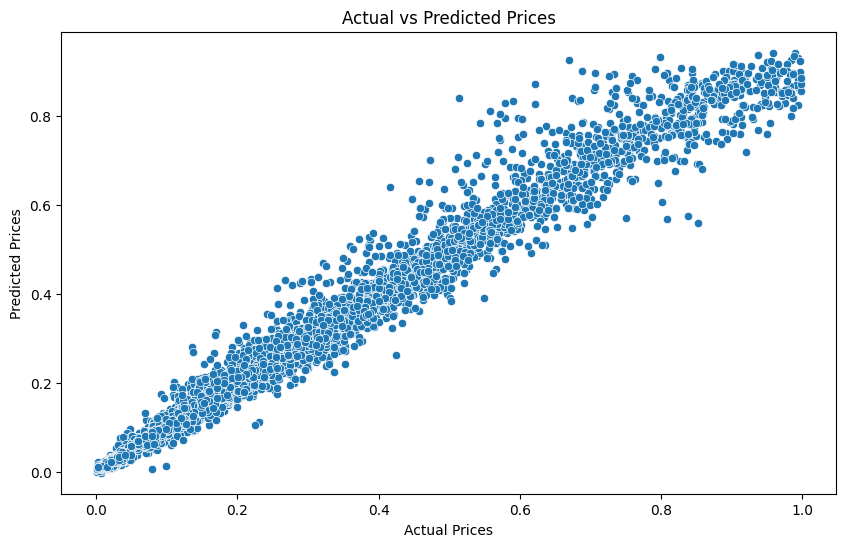

In [317]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()